<a href="https://colab.research.google.com/github/george1123-kabi/Data_Science_project/blob/main/Data_Sciece_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Modules and generating data**

In [ ]:
#initializing essential libraries
import numpy as np
import pandas as pd


np.random.seed(10)

#Generating array of Months
month_name=['January', 'February', 'March', 'April', 'May', 'June',
 'July', 'August', 'September', 'October', 'November', 'December']        #Getting list of months using calendar module
month_int=np.random.randint(0,12,size=100)   #Genarating random numbers in the range between 1 to 12 using numpy
month=[month_name[x] for x in month_int]     #Assiging Month name by comparing index by month_int

#Generating array of Product Catagory
categ=["Electronics","Clothing","Home Goods","Softwares"]  #Product Category list
prod_cat_int=np.random.randint(0,4,size=100)               #Genarating random numbers in the range between 0 to 4 using numpy
prod_cat=[categ[x] for x in prod_cat_int]                  #Assiging Product Category by comparing index by prod_cat_int

#Generating array of Sold Units count
u_sold=np.random.randint(1,1000,size=100)                #Genarating random numbers in the range between 1 to 1000 using numpy

#Generating array of revenue
price_per_unit=100
noise=250000
rev=u_sold*price_per_unit+abs(np.random.normal(0,noise,size=100)).round(2)

data={
    "Month":month,
    "Product_Category":prod_cat,
    "Units_Sold":u_sold,
    "Revenue":rev
}


## Creating Dataframe using Pandas and analysing the structure and performing missing values handling

In [ ]:
#Creating Dataframe
df=pd.DataFrame(data)
print(f"printing first 5 rows of the dataframe:\n\n{df.head()}")

#Checking details about dataframe
print("\nInfo of dataset:")
print(df.info())

#Checking datatypes of each column
print(f"\n\nData Types:\n\n{df.dtypes}")

#Checking null values(There is no null present here, just demonstrating the null handling)
print(f"\n\nNull values count:\n\n{df.isnull().sum()}")                      #returns the count of null in column wise
df.fillna(df.mean(numeric_only=True))                                        #if null presents then it will replace them with average of imdividual column. works only in numerical columns.

#to check the shape of the dataframe (rows,columns)
print(f"\n\nShape of Data frame:{df.shape}")

#Checking descriptive statistics for the numerical columns
print(f"\n\nDescriptive Statistics:\n\n{df.describe()}\n")


#Checking correlation between Unit Sold and Revenue by creating correlation matrix.
print("Correlation  between Revenue and Units Sold:")
print(df[['Units_Sold','Revenue']].corr())


## Analysing descriptive statistics for revenue column and grouping average revenue by product category

In [ ]:
#Performing datatype changing
df['Revenue']=df['Revenue'].astype(float)
df['Units_Sold']=df['Units_Sold'].astype(int)
print(df.dtypes)

mean=df['Revenue'].mean()
median=df['Revenue'].median()
std_dev=df['Revenue'].std(ddof=0)
max_rev=df['Revenue'].max()
min_rev=df['Revenue'].min()


grp_avg=df.groupby('Product_Category')['Revenue'].mean()

print(f"\nRevenue mean:  {mean}")
print(f"\nRevenue median:  {median}")
print(f"\nRevenue standard deviation:  {std_dev}")
print(f"\nRevenue Minimun:  {min_rev}")
print(f"\nRevenue Maximum:  {max_rev}")
print(f"\nAverage revenue of each Product Category:\n\n{grp_avg}")


## visualizing data with Histogram and Barchart using matplotlib and seaborn

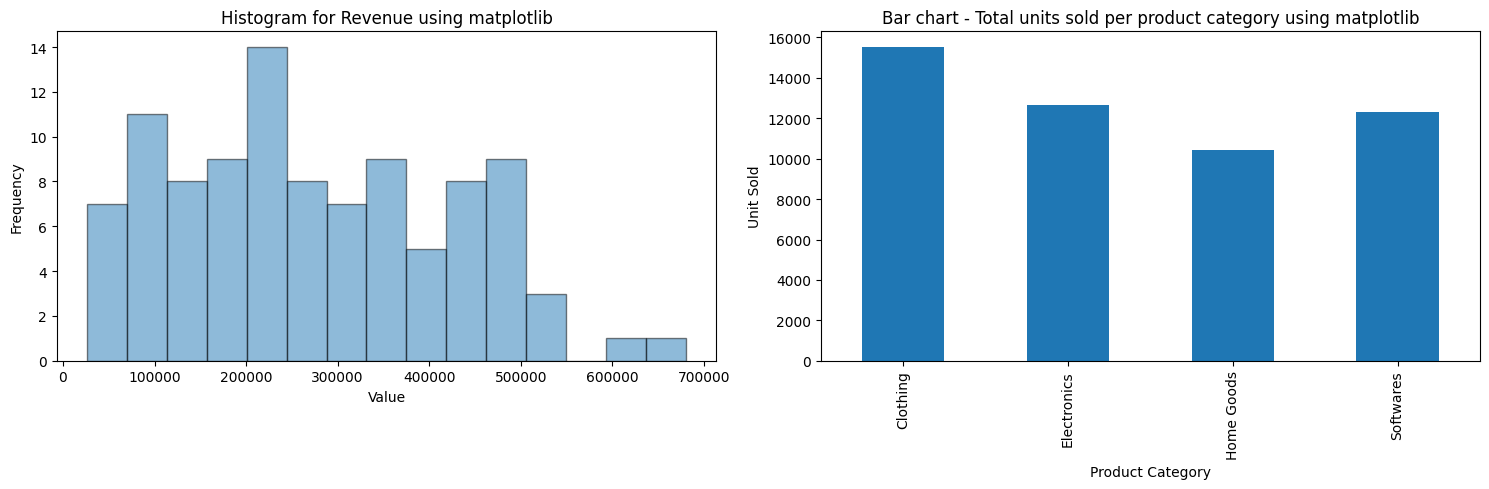

In [27]:
#initializing matplotlib and seaborn modules
import matplotlib.pyplot as plt
import seaborn as sns

#plotting with matplotlib
#creating figure size
plt.figure(figsize=(15,5))

#differentiating subplots
plt.subplot(1,2,1)
#drawing histograms and providing title and lables
plt.hist(df['Revenue'],bins=15,edgecolor='black',alpha=0.5)
plt.title('Histogram for Revenue using matplotlib')
plt.xlabel("Value")
plt.ylabel("Frequency")


plt.subplot(1,2,2)
sum_units_sold=df.groupby('Product_Category')['Units_Sold'].sum()
sum_units_sold.plot(kind="bar",legend=False)
plt.title('Bar chart - Total units sold per product category using matplotlib')
plt.xlabel("Product Category")
plt.ylabel("Unit Sold")

plt.tight_layout()
plt.show()


